In [21]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_table('column_2C.dat',sep='\s+', header = None)
df.columns = ['PelvicIncidence', 'PelvicTilt', 'LumbarLordosisAngle', 'SacralSlope', 'PelvicRadius','DegreeSpondylolisthesis','Class']
df

,PelvicIncidence,PelvicTilt,LumbarLordosisAngle,SacralSlope,PelvicRadius,DegreeSpondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


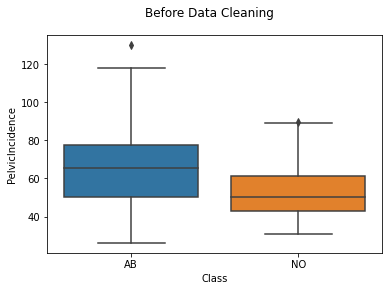

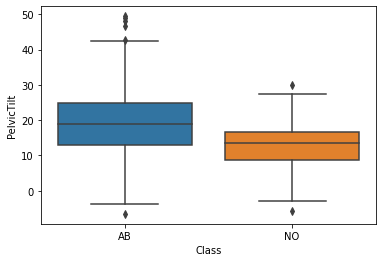

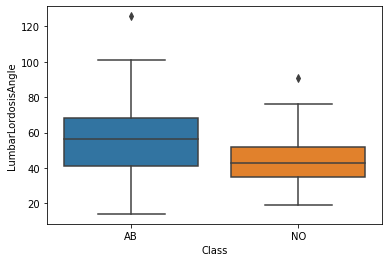

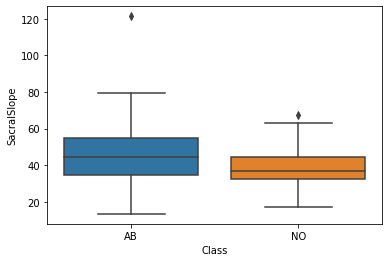

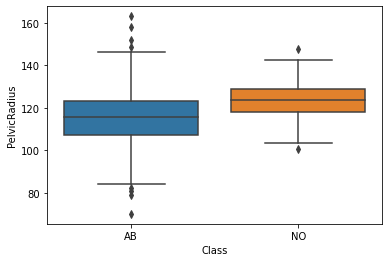

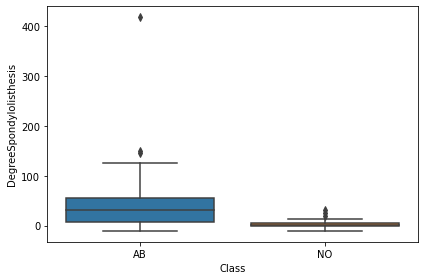

In [23]:
f = plt.figure(1)
sns.boxplot(x='Class',y='PelvicIncidence',data = df);
plt.suptitle('Before Data Cleaning')

f = plt.figure(2)
sns.boxplot(x='Class',y='PelvicTilt',data = df);

f = plt.figure(3)
sns.boxplot(x='Class',y='LumbarLordosisAngle',data = df);

f = plt.figure(4)
sns.boxplot(x='Class',y='SacralSlope',data = df);

f = plt.figure(5)
sns.boxplot(x='Class',y='PelvicRadius',data = df);

f = plt.figure(6)
sns.boxplot(x='Class',y='DegreeSpondylolisthesis',data = df);


f.tight_layout(h_pad = 3)


In [24]:
for k in range(len(df.columns)-1):
    PIAB = df.loc[df.Class=='AB',df.columns[k]]
    Q1 = PIAB.quantile(0.25)
    Q3 = PIAB.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    df[df.columns[k]][(df[df.columns[k]]>upper_limit) & (df.Class == 'AB')] = PIAB.quantile(0.75)
    df[df.columns[k]][(df[df.columns[k]]<lower_limit) & (df.Class == 'AB')] = PIAB.quantile(0.25)

    PINO = df.loc[df.Class=='NO',df.columns[k]]
    Q1 = PINO.quantile(0.25)
    Q3 = PINO.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    df[df.columns[k]][(df[df.columns[k]]>upper_limit) & (df.Class == 'NO')] = PINO.quantile(0.75)
    df[df.columns[k]][(df[df.columns[k]]<lower_limit) & (df.Class == 'NO')] = PINO.quantile(0.25)



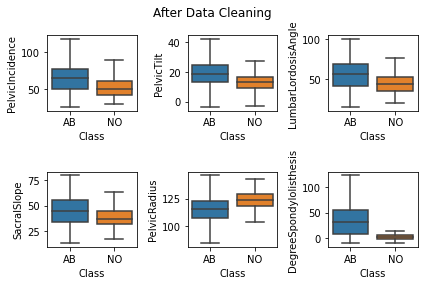

In [25]:
f = plt.figure(2)

plt.subplot(2,3,1)
sns.boxplot(x='Class',y='PelvicIncidence',data = df);

plt.subplot(2,3,2)
sns.boxplot(x='Class',y='PelvicTilt',data = df);

plt.subplot(2,3,3)
sns.boxplot(x='Class',y='LumbarLordosisAngle',data = df);

plt.subplot(2,3,4)
sns.boxplot(x='Class',y='SacralSlope',data = df);

plt.subplot(2,3,5)
sns.boxplot(x='Class',y='PelvicRadius',data = df);

plt.subplot(2,3,6)
sns.boxplot(x='Class',y='DegreeSpondylolisthesis',data = df);

plt.suptitle('After Data Cleaning')
f.tight_layout(h_pad = 3)
f.savefig('AfterDC.pdf')


In [26]:
df.columns

Index(['PelvicIncidence', 'PelvicTilt', 'LumbarLordosisAngle', 'SacralSlope',
       'PelvicRadius', 'DegreeSpondylolisthesis', 'Class'],
      dtype='object')

In [27]:
df1 = df[['PelvicIncidence', 'PelvicTilt', 'LumbarLordosisAngle', 'SacralSlope','PelvicRadius', 'DegreeSpondylolisthesis']]
df1.head()

,PelvicIncidence,PelvicTilt,LumbarLordosisAngle,SacralSlope,PelvicRadius,DegreeSpondylolisthesis
0,63.03,22.55,39.61,40.48,98.67,-0.25
1,39.06,10.06,25.02,29.00,114.41,4.56
2,68.83,22.22,50.09,46.61,105.99,-3.53
3,69.30,24.65,44.31,44.64,101.87,11.21
4,49.71,9.65,28.32,40.06,108.17,7.92


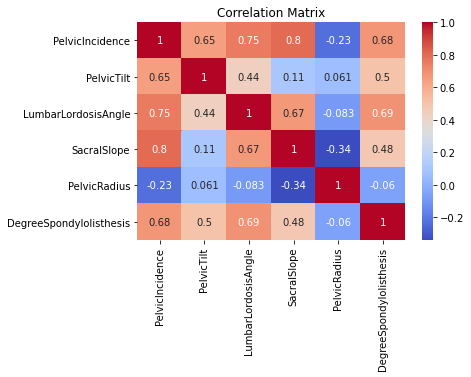

In [28]:
#Here we use default correlation method Pearson Correlation Coefficient Technique

plt.figure(3)
sns.heatmap(df1.corr(), annot=True, cmap = 'coolwarm');
plt.title('Correlation Matrix')
plt.savefig('Corr_Heatmap.pdf',bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

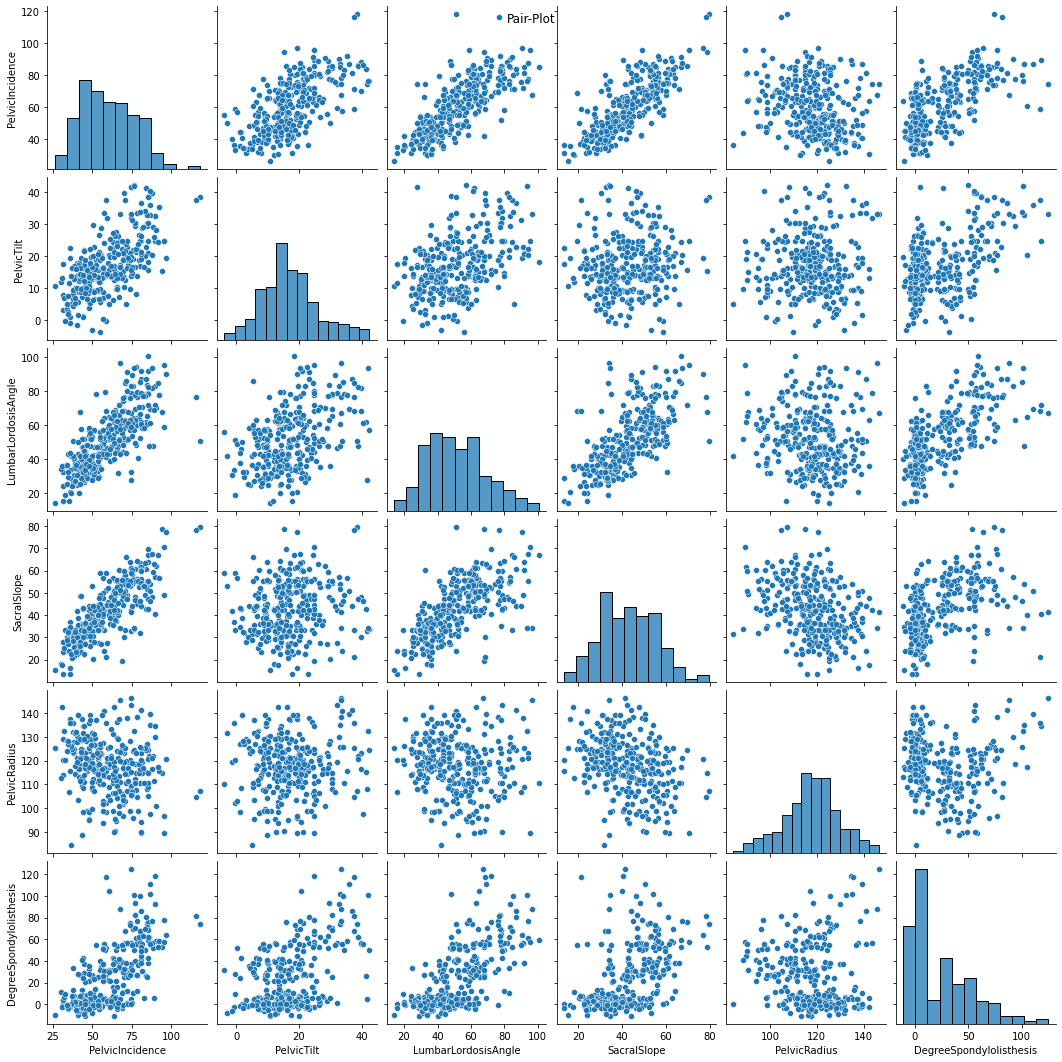

In [29]:
plt.figure()
sns.pairplot(df1,)
plt.suptitle('Pair-Plot')
plt.savefig('PairPlot.pdf',bbox_inches='tight');

[0.13011238 0.13049818 0.11251063 0.11029503 0.18386432 0.33271947]


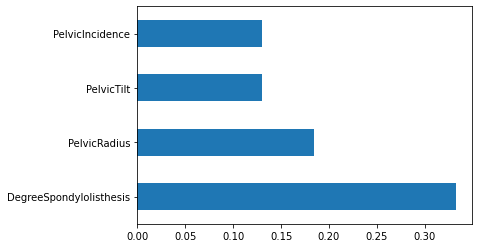

In [30]:
X = df.iloc[:,0:6]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

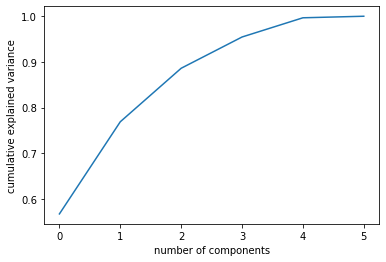

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)
from sklearn.decomposition import PCA
plt.figure()
plt.plot(np.cumsum(pca.fit(scaled_data).explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [46]:
pca = PCA(n_components=4)
up_data = pca.fit_transform(scaled_data)
up_data

array([[-0.27603053, -1.04549964,  1.68123607, -0.54261328],
       [-2.35601051, -0.36345981,  0.47689998,  0.41463563],
       [ 0.24577545, -0.79448127,  0.95262305, -0.99256278],
       ...,
       [-0.54096463,  0.73081745,  0.23315192, -0.99706549],
       [-1.63269339, -0.40842366, -0.29551959,  0.01278551],
       [-2.5815309 , -0.02460382, -0.55509406,  0.44052274]])

In [48]:
up_dataframe = pd.DataFrame(up_data,columns=['PC1','PC2','PC3','PC4'])
up_dataframe

,PC1,PC2,PC3,PC4
0,-0.276031,-1.045500,1.681236,-0.542613
1,-2.356011,-0.363460,0.476900,0.414636
2,0.245775,-0.794481,0.952623,-0.992563
3,0.402778,-0.777733,1.461744,-0.572898
4,-1.457000,-1.113983,0.419140,0.119137
...,...,...,...,...
305,-1.649579,-0.177292,0.280202,-0.261706
306,-1.322607,0.058264,1.089643,-0.449437
307,-0.540965,0.730817,0.233152,-0.997065
308,-1.632693,-0.408424,-0.295520,0.012786
